In [1]:
#### lib required for dashboard
import plotly.graph_objects as go
import dash
import dash_html_components as html
import dash_core_components as dcc

import plotly.offline as pyo

from dash.dependencies import State, Input, Output

import numpy as np
import pandas as pd

In [4]:
data=pd.read_csv("data.csv")

In [12]:
data.head()

,ID,T1,T2,T3,Tamb,T1_AVE,T1_AVW,T1_SDW,T2_AVE,T2_AVW,T2_SDW,T3_AVE,T3_AVW,T3_SDW,Tamb_AVE,Tamb_AVW,Tamb_SDW,Time
0,7,50.654294,65.719724,25.327147,22.244665,12.663574,50.654294,0.00000,16.429931,65.719724,0.000000,6.331787,25.327147,0.00000,5.561166,22.244665,0.000000,0.0
1,2,42.885539,57.174093,21.442770,21.916863,10.721385,42.885539,0.00000,14.293523,57.174093,0.000000,5.360692,21.442770,0.00000,5.479216,21.916863,0.000000,0.0
2,6,27.776378,40.554016,13.888189,22.337230,6.944095,27.776378,0.00000,10.138504,40.554016,0.000000,3.472047,13.888189,0.00000,5.584308,22.337230,0.000000,0.0
3,6,23.240338,35.564372,11.620169,22.113755,11.018155,25.508358,2.26802,16.494971,38.059194,2.494822,5.509078,12.754179,1.13401,9.716669,22.225493,0.111737,0.0
4,0,72.333508,89.566858,36.166754,21.821622,18.083377,72.333508,0.00000,22.391715,89.566858,0.000000,9.041688,36.166754,0.00000,5.455405,21.821622,0.000000,0.0


In [99]:
cat_g=sorted(data['ID'].unique())
print(cat_g)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]


In [100]:
def datagen(data):
    
    sampled_data =pd.DataFrame(columns=data.columns)
    for i in cat_g:
        grouped_data=data[data['ID']==i].groupby('Time').mean()
        grouped_data=grouped_data.reset_index()
        sampled_data=pd.concat([sampled_data,grouped_data],ignore_index= True, sort=False)
    return(data)

In [101]:
cat_g=sorted(data['ID'].unique())
## Creating values and lables for dropdown

options_list = []
for i in cat_g:
    options_list.append({'label': i, 'value': i})
    

In [102]:
def fig_generator(sample_data):
    sample_data = sample_data.reset_index(drop=True)
    sample_data.head()
    plot_data =[]
    temp=['T1','T2','Tamb']
    for i in temp:
        plot_data.append(go.Scatter(x=data['Time'], y=data[i], name = i ))
    plot_layout = go.Layout(title = " This plot is generated using plotly  ")

    fig = go.Figure( data = plot_data ,layout = plot_layout)

    return(fig.data,fig.layout)

In [104]:
### Dash board code 
    
app = dash.Dash()

### defining the HTML component


app.layout = html.Div(children=[html.Div("Welcome to the dashboard",style= {   "color": "white",
                                                      "text-align": "center","background-color": "blue",
                                                      "border-style": "dotted","display":"inline-block","width":"80%"
                                                      
                                                    }),
                       html.Div(dcc.Dropdown(id = "drop_down_1" ,options= options_list , value= 1
                                                       ),style= {
                                                      "color": "green",
                                                      "text-align": "center","background-color": "darkorange",
                                                      "border-style": "dotted","display":"inline-block","width":"20%"
                                                      
                                                    }),
                       html.Div(children=[html.P(
                            id="map-title",
                            children = "Forecast and validation for Facility ",
                        ), html.Div(dcc.Graph(id ="plot_area"))
                                                       ],style= {
                                                      "color": "black",
                                                      "text-align": "center","background-color": "yellow",
                                                      "border-style": "dotted","display":"inline-block","width":"75%",
                                                                                                            
                                                    })],style={"width":"100%",'paffing':10})

## Creating callback buttons

@app.callback(Output("plot_area", 'figure'),
              
              [Input("drop_down_1", "value")])

def updateplot(input_cat):
    
    df= datagen()
    sample_data = df[df["ID"] == input_cat ]
    trace,layout = fig_generator(sample_data)
    
    return {
        'data': trace,
        'layout':layout
    }
    
    
    
if __name__=='__main__':
    app.run_server()
	

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

 in production, use a production WSGI server like gunicorn instead.

 in production, use a production WSGI server like gunicorn instead.

 in production, use a production WSGI server like gunicorn instead.

 in production, use a production WSGI server like gunicorn instead.

 in production, use a production WSGI server like gunicorn instead.

 in production, use a production WSGI server like gunicorn instead.

 in production, use a production WSGI server like gunicorn instead.

 in production, use a production WSGI server like gunicorn instead.

 in production, use a production WSGI server like gunicorn in

 * Running on http://127.0.0.1:8050/ (Press CTRL+C to quit)
127.0.0.1 - - [05/Aug/2020 22:55:51] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [05/Aug/2020 22:55:52] "GET /_dash-layout HTTP/1.1" 200 -
127.0.0.1 - - [05/Aug/2020 22:55:52] "GET /_dash-dependencies HTTP/1.1" 200 -
[2020-08-05 22:55:53,446] ERROR in app: Exception on /_dash-update-component [POST]
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\flask\app.py", line 2292, in wsgi_app
    response = self.full_dispatch_request()
  File "C:\ProgramData\Anaconda3\lib\site-packages\flask\app.py", line 1815, in full_dispatch_request
    rv = self.handle_user_exception(e)
  File "C:\ProgramData\Anaconda3\lib\site-packages\flask\app.py", line 1718, in handle_user_exception
    reraise(exc_type, exc_value, tb)
  File "C:\ProgramData\Anaconda3\lib\site-packages\flask\_compat.py", line 35, in reraise
    raise value
  File "C:\ProgramData\Anaconda3\lib\site-packages\flask\app.py", line 1813, in full_dispatc

127.0.0.1 - - [05/Aug/2020 22:56:52] "POST /_dash-update-component HTTP/1.1" 500 -
[2020-08-05 22:57:46,333] ERROR in app: Exception on /_dash-update-component [POST]
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\flask\app.py", line 2292, in wsgi_app
    response = self.full_dispatch_request()
  File "C:\ProgramData\Anaconda3\lib\site-packages\flask\app.py", line 1815, in full_dispatch_request
    rv = self.handle_user_exception(e)
  File "C:\ProgramData\Anaconda3\lib\site-packages\flask\app.py", line 1718, in handle_user_exception
    reraise(exc_type, exc_value, tb)
  File "C:\ProgramData\Anaconda3\lib\site-packages\flask\_compat.py", line 35, in reraise
    raise value
  File "C:\ProgramData\Anaconda3\lib\site-packages\flask\app.py", line 1813, in full_dispatch_request
    rv = self.dispatch_request()
  File "C:\ProgramData\Anaconda3\lib\site-packages\flask\app.py", line 1799, in dispatch_request
    return self.view_functions[rule.endpoint](*

In [40]:
fig_generator(sample_data)

NameError: name 'sample_data' is not defined

In [10]:
df= datagen()
df.head(10)

,val_1,val_2,val_3,sample_Cat
0,0.084421,0.458635,0.098498,bad
1,0.576283,0.314452,0.327935,worst
2,0.386652,0.211206,0.117826,good
3,0.338703,0.228567,0.708058,bad
4,0.452373,0.335204,0.964615,bad
5,0.610599,0.548404,0.924921,worst
6,0.762451,0.946174,0.161435,worst
7,0.988919,0.744122,0.271238,bad
8,0.129755,0.588389,0.142694,worst
9,0.577858,0.769259,0.129795,bad


In [46]:
data.groupby('Time').mean()

,ID,T1,T2,T3,Tamb,T1_AVE,T1_AVW,T1_SDW,T2_AVE,T2_AVW,T2_SDW,T3_AVE,T3_AVW,T3_SDW,Tamb_AVE,Tamb_AVW,Tamb_SDW
Time,,,,,,,,,,,,,,,,,
0.0,5.000000,51.021455,66.123601,61.874364,21.986031,24.814841,50.996048,2.983609,29.734140,65.746888,2.980675,20.343624,61.706070,1.289051,10.717316,22.013149,0.098791
1.0,5.000000,51.877216,67.064937,62.302244,22.061272,43.272367,51.419961,4.375178,49.789913,65.890845,4.384485,28.102381,62.040733,1.870161,18.461626,22.023684,0.189659
2.0,5.000000,50.735141,65.808655,61.731207,22.109964,48.592922,51.358151,4.571712,55.631778,65.708956,4.565423,30.093453,61.960396,1.893247,20.936653,22.043544,0.185554
3.0,5.000000,50.267112,65.293824,61.497193,22.145203,49.824719,51.036061,4.797716,57.204075,65.413331,4.807973,30.479168,61.727554,2.010087,21.756350,22.095289,0.184770
4.0,5.000000,51.617825,66.779608,62.172549,22.213299,50.772905,50.763856,4.953395,58.206005,65.259897,5.141730,31.029641,61.572068,2.129402,22.064094,22.152958,0.182290
5.0,5.000000,50.903791,65.994170,61.815532,22.225541,50.530501,50.670476,4.944646,58.038373,65.202250,5.122093,30.924472,61.631971,2.171055,22.165359,22.193252,0.190475
6.0,5.000000,50.196630,65.216294,61.461952,22.303368,50.527293,50.734736,4.655869,57.854659,65.175094,4.797567,30.837285,61.634249,1.935093,22.247565,22.239618,0.196688
7.0,5.000000,51.402079,66.542286,62.064676,22.313615,50.915957,50.701053,4.283057,58.364520,65.144353,4.361301,31.254973,61.713121,1.723906,22.279636,22.270703,0.195336
8.0,5.000000,50.445786,65.490365,61.586529,22.417665,50.645452,50.722914,4.248467,57.884662,65.016228,4.360321,31.211413,61.840708,1.699285,22.358497,22.330507,0.184071


In [70]:
cat_g=sorted(data['ID'].unique())

(755, 18)

In [94]:
sampled_data =pd.DataFrame(columns=data.columns)
ll=[]
for i in cat_g:
    grouped_data=data[data['ID']==i].groupby('Time').mean()
    ll.append(grouped_data.shape[0])
ll    

[59, 72, 70, 73, 68, 65, 70, 69, 72, 66, 71]

In [96]:
data[data['ID']==2].groupby('Time').mean()

,ID,T1,T2,T3,Tamb,T1_AVE,T1_AVW,T1_SDW,T2_AVE,T2_AVW,T2_SDW,T3_AVE,T3_AVW,T3_SDW,Tamb_AVE,Tamb_AVW,Tamb_SDW
Time,,,,,,,,,,,,,,,,,
0.0,2,38.749890,52.624879,19.374945,21.866086,18.588591,38.622546,5.339986,25.320498,52.484801,5.873985,9.294296,19.311273,2.669993,10.652836,21.869160,0.047363
1.0,2,45.216916,59.738608,22.608458,22.151372,36.230684,41.478184,6.591025,48.231553,55.626002,7.250128,18.115342,20.739092,3.295513,18.504470,22.026015,0.280612
2.0,2,44.862771,59.349048,22.431386,22.125593,41.398710,42.782178,5.206331,55.025307,57.060396,5.726964,20.699355,21.391089,2.603165,20.933771,22.043984,0.240395
3.0,2,41.321500,55.453650,20.660750,22.022173,42.496244,44.010668,5.121472,56.583465,58.411735,5.633619,21.248122,22.005334,2.560736,21.694659,22.067915,0.229652
4.0,2,37.792567,51.571824,18.896283,22.199890,40.101672,41.698798,6.504980,54.060454,55.868678,7.155478,20.050836,20.849399,3.252490,22.025994,22.106470,0.189092
5.0,2,39.163732,53.080105,19.581866,22.165053,38.427501,39.088742,6.409096,52.253993,52.997616,7.050006,19.213751,19.544371,3.204548,22.123345,22.150355,0.186130
6.0,2,37.844381,51.628819,18.922190,22.494061,38.972958,38.707717,5.158035,52.865110,52.578489,5.673838,19.486479,19.353858,2.579017,22.301916,22.247564,0.213074
7.0,2,42.099110,56.309021,21.049555,22.332914,40.212139,39.557057,4.319103,54.231726,53.512762,4.751013,20.106070,19.778528,2.159551,22.369907,22.335111,0.234068
8.0,2,37.590937,51.350031,18.795468,22.433649,39.320617,39.434262,3.909672,53.252163,53.377688,4.300639,19.660308,19.717131,1.954836,22.371861,22.407262,0.130009


In [51]:
sampled_data = pd.DataFrame(columns=data.columns)

In [60]:
import matplotlib.pyplot as plt

<Figure size 720x720 with 0 Axes>

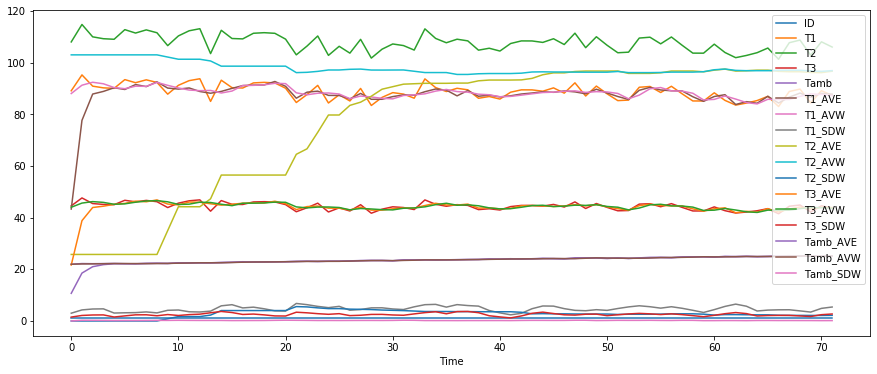

In [66]:
plt.figure(figsize=(10, 10))
df=data[data['ID']==1].groupby('Time').mean().plot.line(figsize=(15, 6))
df.reset_index
plt.legend(loc='upper right')

In [ ]:
plt.plot(data[])